In [2]:
import random
import math
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import partial
import statistics
import scipy.stats as stats
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import binom
%matplotlib inline
%precision 4
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from scipy.stats import beta
from functools import partial
np.random.seed(1234)


In [3]:
def rw2(n):# this gives samples from weibull(5,2)# put n=10000,the shape 5 and the scale 2
    x,y=0,0
    distance=[]
    for i in range(1,n+1):
            r=random.weibullvariate(alpha,beta) # step size r
            theta=2.*math.pi*random.random()
            x +=r*math.cos(theta)
            y +=r*math.sin(theta)
            distance.append(r)# save the distances r for the mcmc sampler
    return(np.array(distance))# depending what do you want to do, either save the pairs, or save the distances r  between points
    #return(x,y)
    
alpha=2#float(input("what's the scale?"))
beta=5#float(input("what's the shape?"))
n=10000#int(input("how many steps?"))
#tries=int(input("how many tries?"))#  put tries=1  in order to properly save the list distance
data = rw2(n)# very important because you need the same data, if you put rw2(n) in there you change the data every time


In [4]:
# calculate the log likelihood of weibull(a,b)
import scipy.stats 
from scipy.stats import dweibull
def log_likelihood(x,a,b):
     return sum(dweibull.logpdf(x,scale=b,c=a))

In [5]:
import scipy.stats as stats
import numpy as np
#n=10000 #number of observations in a sample 
# initial guess for theta(a and b) as array.
def mh(guess):
    #guess = [5.0,2.0]
# Prepare storing MCMC chain as array of arrays.
    A = [guess]
    # define stepsize of MCMC.
    stepsizes = [0.01,0.01]  # array of stepsizes
    accepted  = 0.0
    old_theta=guess# define initial values for theta 
    old_loglik = log_likelihood(data,old_theta[0],old_theta[1])#calculate the first log likelihood
# Metropolis-Hastings with 10,000 iterations.
    for p in range(10000):
    #old_theta  = A[len(A)-1]   old parameter value as array(not that elegant way)
    # Suggest new candidate from Gaussian proposal distribution.
    #new_theta = np.zeros([len(old_theta)])
        new_theta = old_theta + stats.norm(0, stepsizes).rvs() 
    #add the restraints on new_theta
        if new_theta[0]<0 or new_theta[1]<0: 
            continue
        new_loglik = log_likelihood(data,new_theta[0],new_theta[1])
    # Accept new candidate in Monte-Carlo fashing.
        if (new_loglik > old_loglik):
            A.append(new_theta)
            accepted = accepted + 1.0  # monitor acceptance
            old_loglik=new_loglik
            old_theta=new_theta
        else:
            u = random.uniform(0.0,1.0)
            if (u < math.exp(new_loglik - old_loglik)):
                A.append(new_theta)
                accepted = accepted + 1.0  # monitor acceptance
                old_loglik=new_loglik
                old_theta=new_theta
            else:
                A.append(old_theta)
    print("Acceptance rate = "+str(accepted/10000.0))
    return A


In [6]:
#print(A)
guess = [5.0,2.0]
mh(guess)

Acceptance rate = 0.4215


[[5.0000, 2.0000],
 [5.0000, 2.0000],
 [5.0000, 2.0000],
 [5.0000, 2.0000],
 [5.0000, 2.0000],
 [5.0000, 2.0000],
 [5.0000, 2.0000],
 [5.0000, 2.0000],
 array([ 4.9967,  2.    ]),
 array([ 5.0007,  2.0029]),
 array([ 5.0007,  2.0029]),
 array([ 4.9987,  1.9964]),
 array([ 5.0006,  2.0019]),
 array([ 5.0138,  1.9972]),
 array([ 5.0138,  1.9972]),
 array([ 5.0138,  1.9972]),
 array([ 5.0098,  2.0006]),
 array([ 5.0098,  2.0006]),
 array([ 5.0185,  1.9993]),
 array([ 5.0185,  1.9993]),
 array([ 5.0185,  1.9993]),
 array([ 5.0192,  1.9937]),
 array([ 5.0192,  1.9937]),
 array([ 5.0192,  1.9937]),
 array([ 5.0179,  1.9939]),
 array([ 5.0254,  1.996 ]),
 array([ 5.0254,  1.996 ]),
 array([ 5.0114,  1.995 ]),
 array([ 5.0059,  1.9936]),
 array([ 5.0094,  1.9932]),
 array([ 5.0151,  2.0087]),
 array([ 5.0054,  2.008 ]),
 array([ 5.0084,  2.0059]),
 array([ 5.0084,  2.0059]),
 array([ 5.0084,  2.0059]),
 array([ 5.0084,  2.0059]),
 array([ 5.0084,  2.0059]),
 array([ 5.0084,  2.0059]),
 array([

In [7]:
sampless_shape = [mh([theta,2]) for theta in np.linspace(2,7,5)]# 5 mh chains for shape keeping the scale fixed at 2 and varying 
# the starting points for the shape from 2 to 7

Acceptance rate = 0.4201
Acceptance rate = 0.4296
Acceptance rate = 0.4192
Acceptance rate = 0.4298
Acceptance rate = 0.4177


In [8]:
sampless_scale=[mh([5,theta]) for theta in np.linspace(1,6,5)]
#5 mh chains for scale keeping the shape fixed at 5 and varying the starting points from 1 to 3

Acceptance rate = 0.4179
Acceptance rate = 0.4245
Acceptance rate = 0.4177
Acceptance rate = 0.4296
Acceptance rate = 0.4307


In [9]:
#sampless_shape
final_shape_vector=[[p[0] for p in chain] for chain in sampless_shape] #
#final_shape_vector
#len(final_shape_vector)
#print(len(final_shape_vector[0]))# check everything is alright.Seems to be working!
#print(len(sampless_shape[0]))
# I want one vector consisting of 5 vectors each consisting of first entry of each pair

In [10]:
final_scale_vector=[[p[1] for p in chain] for chain in sampless_scale]
#final_scale_vector


Text(0.5,0,'Number of iterations')

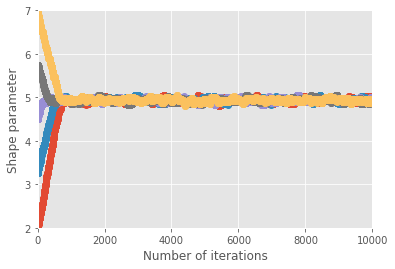

In [14]:
# Convergence of multiple chains for shape

for samples in final_shape_vector:
    plt.plot(samples, '-o')
plt.xlim([0, 10000])
plt.ylim([2, 7])
plt.ylabel("Shape parameter")
plt.xlabel("Number of iterations")

Text(0.5,0,'Number of iterations')

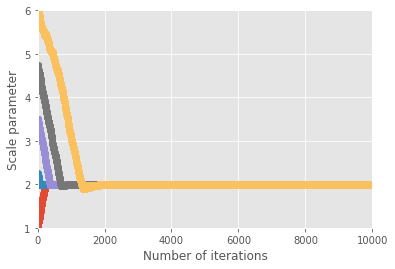

In [15]:
# Convergence of multiple chains for scale

for samples in final_scale_vector:
    plt.plot(samples, '-o')
plt.xlim([0, 10000])
plt.ylim([1,6])
plt.ylabel("Scale parameter")
plt.xlabel("Number of iterations")